In [1]:
import pandas as pd
import numpy as np

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [309]:
voting_data = pd.read_csv("house-votes-84.data", header = None)

In [310]:
# convert y to 1 and n to 0 and ? to NA
voting_data = voting_data.replace(["y", "n", "?"], [1, 0, np.nan])

In [311]:
# replace NA with mean
voting_data = voting_data.fillna(voting_data.mean())

In [312]:
voting_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000,republican.
1,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689,republican.
2,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000,democrat.
3,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000,democrat.
4,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000,democrat.


In [313]:
# strip out periods from last column
voting_data[16] = voting_data[16].str.replace('[^\w\s]','')

In [314]:
voting_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000,republican
1,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689,republican
2,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000,democrat
3,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000,democrat
4,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000,democrat


### Challenge 2

Split the data into a test and training set

In [315]:
from sklearn.cross_validation import train_test_split

In [316]:
x_train, x_test, y_train, y_test = train_test_split(voting_data.ix[:, 0:15], voting_data.ix[:,16], test_size=.30, random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

Which k value gives the highest accuracy?

In [317]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [318]:
accuracy_scores = {}
for nn in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors = nn)
    neigh.fit(x_train, y_train) 
    accuracy_scores[nn] = accuracy_score(y_test, neigh.predict(x_test))

In [319]:
print max(accuracy_scores, key=accuracy_scores.get)
print accuracy_scores[max(accuracy_scores, key=accuracy_scores.get)]

6
0.931297709924


6 nearest neighbors gives us highest accuracy at .931

### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [32]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
Log_acc = lr.score(x_test, y_test)
print Log_acc

0.93893129771


Test accuracy is .938

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [15]:
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


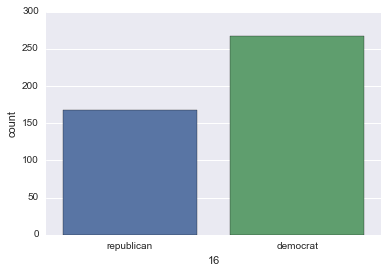

In [35]:
sns.countplot(x = 16, data = voting_data)

In [217]:
def all_same(X, party):
    return [party] * len(X)
y_pred = all_same(y_test, "democrat")
Dem_acc = accuracy_score(y_test, y_pred)
print Dem_acc

0.587786259542


58% accuracy with k-nearest neighbors

In [78]:
y_pred = all_same(y_test, "republican")

In [79]:
Rep_acc = accuracy_score(y_test, y_pred)
print Rep_acc

0.412213740458


41% accuracy now

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [85]:
# x-axis is k, KNN accuracy plot over it
# Put all predictions into a dataframe
# , "Dem_acc": , "Rep_acc": , "log_acc": 
predictions_df = pd.DataFrame({'K': range(1, 21), 'KNN': accuracy_scores.values(), "All Democrat": [Dem_acc] * 20, 
                              "All Republican": [Rep_acc] * 20, "Logistic": [Log_acc] * 20})

In [86]:
tidy_pdf = pd.melt(predictions_df, id_vars = "K")

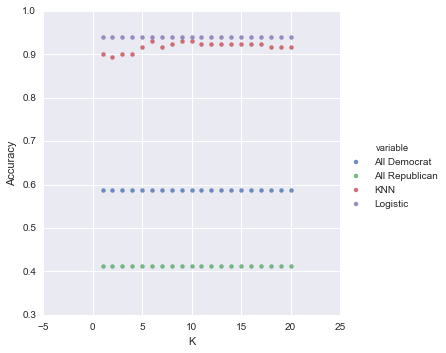

In [87]:
acc_plot = sns.lmplot(x = "K", y = "value", hue = "variable", data = tidy_pdf, fit_reg = False)
acc_plot.set(ylabel = "Accuracy")

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [132]:
from sklearn.learning_curve import learning_curve

lc = learning_curve(LogisticRegression(), voting_data.ix[:, 0:15], voting_data.ix[:,16])
m, train_err, ts_err = lc[0], lc[1], lc[2]
lc_plot = pd.DataFrame({'Training': np.mean(train_err, axis=1), 'Test':  np.mean(ts_err, axis=1), "m": m})
tidy_lc = pd.melt(lc_plot, id_vars = "m")

In [191]:
lc_plot

,Test,Training,m
0,0.917241,0.942529,29
1,0.921839,0.950355,94
2,0.926437,0.960168,159
3,0.924138,0.959821,224
4,0.933333,0.944828,290


In [192]:
tidy_lc

,m,variable,value
0,29,Test,0.917241
1,94,Test,0.921839
2,159,Test,0.926437
3,224,Test,0.924138
4,290,Test,0.933333
5,29,Training,0.942529
6,94,Training,0.950355
7,159,Training,0.960168
8,224,Training,0.959821
9,290,Training,0.944828


[<matplotlib.text.Text at 0x11137d210>, <matplotlib.text.Text at 0x111396450>]

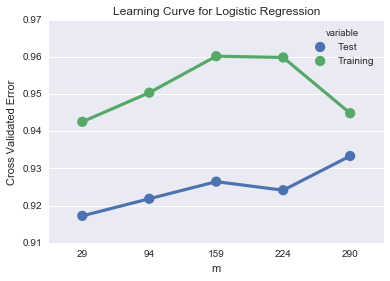

In [139]:
log_lc_plot = sns.pointplot(x = "m", y = "value", hue = "variable", data = tidy_lc)
log_lc_plot.set(ylabel = "Cross Validated Error", title = "Learning Curve for Logistic Regression")

In [136]:
# KNN with 6 
lc = learning_curve(KNeighborsClassifier(n_neighbors = 6), voting_data.ix[:, 0:15], voting_data.ix[:,16])
m, train_err, ts_err = lc[0], lc[1], lc[2]
lc_plot = pd.DataFrame({'Training': np.mean(train_err, axis=1), 'Test':  np.mean(ts_err, axis=1), "m": m})
tidy_lc = pd.melt(lc_plot, id_vars = "m")

[<matplotlib.text.Text at 0x1114b8550>, <matplotlib.text.Text at 0x1116049d0>]

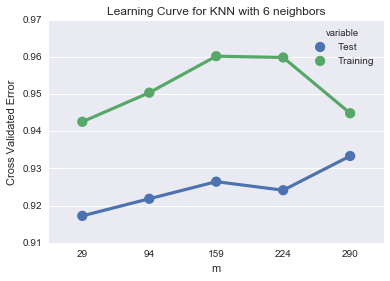

In [140]:
log_lc_plot = sns.pointplot(x = "m", y = "value", hue = "variable", data = tidy_lc)
log_lc_plot.set(ylabel = "Cross Validated Error", title = "Learning Curve for KNN with 6 neighbors")

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

SVM (Support Vector Machine) Classifier

Decision Tree

Random Forest



In [141]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [145]:
NB = GaussianNB()
NB.fit(x_train, y_train) 
print accuracy_score(y_test, NB.predict(x_test))

0.93893129771


In [146]:
SVM = SVC()
SVM.fit(x_train, y_train) 
print accuracy_score(y_test, SVM.predict(x_test))

0.954198473282


In [148]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 
print accuracy_score(y_test, DT.predict(x_test))

0.931297709924


In [149]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train) 
print accuracy_score(y_test, RFC.predict(x_test))

0.93893129771


All perform pretty similarly 

### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [150]:
from sklearn.cross_validation import cross_val_score

In [156]:
print np.mean(cross_val_score(DecisionTreeClassifier(), voting_data.ix[:, 0:15], voting_data.ix[:,16]))
print np.mean(cross_val_score(RandomForestClassifier(), voting_data.ix[:, 0:15], voting_data.ix[:,16]))
print np.mean(cross_val_score(SVC(), voting_data.ix[:, 0:15], voting_data.ix[:,16]))
print np.mean(cross_val_score(GaussianNB(), voting_data.ix[:, 0:15], voting_data.ix[:,16]))
print np.mean(cross_val_score(LogisticRegression(), voting_data.ix[:, 0:15], voting_data.ix[:,16]))
print np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = 6), voting_data.ix[:, 0:15], voting_data.ix[:,16]))

0.947126436782
0.965517241379
0.954022988506
0.931034482759
0.96091954023
0.933333333333


### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [177]:
vd = pd.read_csv("house-votes-84.data", header = None)
vd = vd.replace(["y", "n", "?"], [1, 0, np.nan])
vd = vd.fillna(vd.mode())

In [178]:
vd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican.
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN,republican.
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0,democrat.
3,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1,democrat.
4,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1,democrat.


In [201]:
vd = vd.fillna(vd.mode().ix[0])

In [206]:
# predict 15th vote from 14 other votes
accuracy_scores = {}
for nn in range(1, 21):
    acc_score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = nn), vd.ix[:, 0:14], vd.ix[:,15]))
    accuracy_scores[nn] = acc_score

In [208]:
print max(accuracy_scores, key=accuracy_scores.get)
print accuracy_scores[max(accuracy_scores, key=accuracy_scores.get)]

17
0.850569901503


Best performance is with 17 neighbors, accuracy is .85

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [209]:
movies = pd.read_csv("2013_movies copy 2.csv")

In [210]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


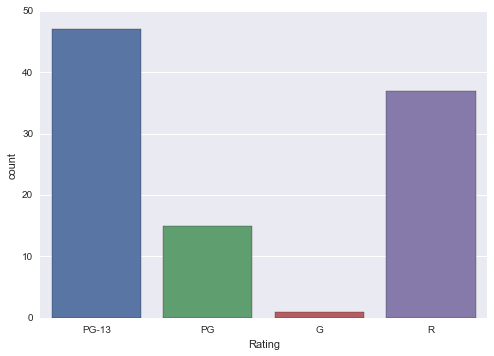

In [212]:
sns.countplot(x = "Rating", data = movies)

In [214]:
movies = movies.dropna()

In [215]:
accuracy_scores = {}
for nn in range(1, 21):
    acc_score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = nn), movies[["Budget", "DomesticTotalGross", "Runtime"]], movies["Rating"]))
    accuracy_scores[nn] = acc_score

In [216]:
print max(accuracy_scores, key=accuracy_scores.get)
print accuracy_scores[max(accuracy_scores, key=accuracy_scores.get)]

12
0.447454844007


In [242]:
# get a random 1/3 
rows = np.random.choice(movies.index.values, len(movies)/3)
movie_test = movies.ix[rows]

In [243]:
y_test = movie_test["Rating"]
y_pred = all_same(y_test, "PG-13")
# take random 1/3 for the test 
dumb_acc = accuracy_score(y_test, y_pred)
print dumb_acc

0.310344827586


In [254]:
np.mean(cross_val_score(LogisticRegression(), movies[["Budget", "DomesticTotalGross", "Runtime"]], movies["Rating"]))

0.55060207991242471

In [255]:
x_train, x_test, y_train, y_test = train_test_split(movies[["Budget", "DomesticTotalGross", "Runtime"]], movies["Rating"], test_size=.30, random_state=4444)

In [295]:
from statsmodels.discrete.discrete_model import MNLogit
mdl = MNLogit(movies["Rating"], movies[["Budget", "DomesticTotalGross", "Runtime"]])
mdl_fit = mdl.fit()
mdl_fit.summary()

Optimization terminated successfully.
         Current function value: 0.831165
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Rating   No. Observations:                   87
Model:                        MNLogit   Df Residuals:                       81
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Aug 2016   Pseudo R-squ.:                  0.1843
Time:                        15:00:07   Log-Likelihood:                -72.311
converged:                       True   LL-Null:                       -88.647
                                        LLR p-value:                 1.394e-06
======================================================================================
      Rating=PG-13       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Budget             -1.997e-09   6.48e-09     -0.308      0.758     -1.47e-08  1.07e-08
DomesticTotalGross -3.188e-09   3.47e-09     -0.919      0.358     -9.98e-09  3.61e-09
Runtime                0.0160      0.006      2.495      0.013         0.003     0.028
--------------------------------------------------------------------------------------
          Rating=R       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Budget             -3.035e-08   9.59e-09     -3.166      0.002     -4.91e-08 -1.16e-08
DomesticTotalGross -3.813e-09    5.4e-09     -0.706      0.480     -1.44e-08  6.78e-09
Runtime                0.0299      0.007      4.256      0.000         0.016     0.044
======================================================================================
"""

Budget and Runtime are the significant predictors, longer runtime makes it more likely for movie to be rated R and PG-13 than PG and smaller budget makes it less likely for a movie to be Rated R

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

What is the earliest year of surgery in this dataset?

What is the most recent year of surgery?

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case

In [259]:
Haberman = pd.read_csv("haberman.data", header = None)

In [263]:
# change headers
Haberman.columns = ['Age', 'Op_Year', 'Nodes', 'Survival']
Haberman.head()

,Age,Op_Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [266]:
Haberman["Age"].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [271]:
# survive 5 or more years
Haberman[Haberman['Survival'] == 1]["Age"].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [272]:
# survived fewer than 5 years
Haberman[Haberman['Survival'] == 2]["Age"].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: Age, dtype: float64

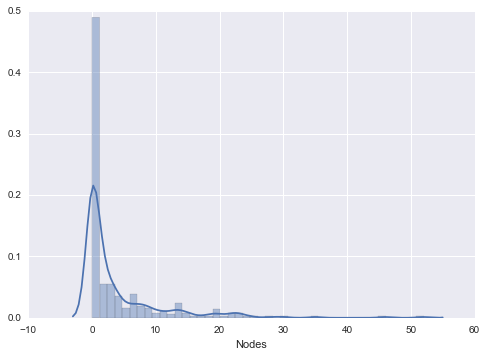

In [273]:
sns.distplot(Haberman["Nodes"])

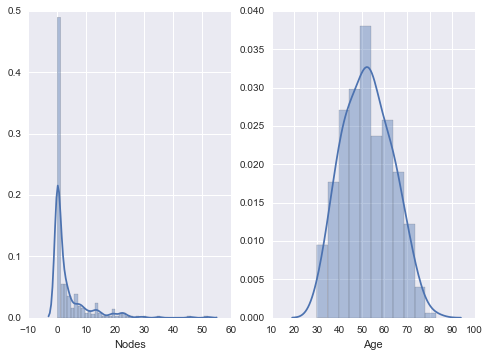

In [280]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.distplot(Haberman["Nodes"], ax = ax1)
sns.distplot(Haberman["Age"], ax = ax2)

In [282]:
Haberman["Op_Year"].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: Op_Year, dtype: float64

Earliest year was 1958 and most recent was 1969. 

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case

In [283]:
from statsmodels.discrete.discrete_model import Logit

In [285]:
x_train, x_test, y_train, y_test = train_test_split(Haberman[["Op_Year", "Age", "Nodes"]], Haberman["Survival"], test_size=.30, random_state=4444)

In [286]:
Logit()

TypeError: __init__() takes exactly 3 arguments (1 given)

In [288]:
np.mean(cross_val_score(LogisticRegression(), Haberman[["Op_Year", "Age", "Nodes"]], Haberman["Survival"]))

0.75163398692810457

Model does fairly well, 75% accuracy 

[<matplotlib.text.Text at 0x11591f850>, <matplotlib.text.Text at 0x116008510>]

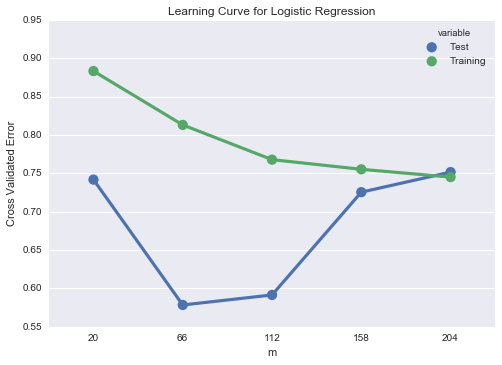

In [287]:
lc = learning_curve(LogisticRegression(), Haberman[["Op_Year", "Age", "Nodes"]], Haberman["Survival"])
m, train_err, ts_err = lc[0], lc[1], lc[2]
lc_plot = pd.DataFrame({'Training': np.mean(train_err, axis=1), 'Test':  np.mean(ts_err, axis=1), "m": m})
tidy_lc = pd.melt(lc_plot, id_vars = "m")
log_lc_plot = sns.pointplot(x = "m", y = "value", hue = "variable", data = tidy_lc)
log_lc_plot.set(ylabel = "Cross Validated Error", title = "Learning Curve for Logistic Regression")

In [302]:
# replace 2 in Survival with 0 so can run a Logit
Haberman["Survival"] = Haberman["Survival"].replace(to_replace = 2, value = 0)
log = Logit(Haberman["Survival"], Haberman[["Op_Year", "Age", "Nodes"]])
log_fit = log.fit()
log_fit.summary()

Optimization terminated successfully.
         Current function value: 0.537159
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survival   No. Observations:                  306
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2016   Pseudo R-squ.:                 0.07053
Time:                        15:04:29   Log-Likelihood:                -164.37
converged:                       True   LL-Null:                       -176.84
                                        LLR p-value:                 3.827e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Op_Year        0.0380      0.011      3.431      0.001         0.016     0.060
Age           -0.0184      0.013     -1.466      0.143        -0.043     0.006
Nodes         -0.0881      0.020     -4.435      0.000        -0.127    -0.049
==============================================================================
"""

Later operating years and smaller number of nodes had longer 5-year survival rates